[vggface](https://github.com/prlz77/vgg-face.pytorch)

[audio](https://github.com/rajamohanharesh/Emotion-Recognition)

## detecting faces

In [ ]:
!pip install deepface

     |████████████████████████████████| 61 kB 3.7 MB/s 
     |████████████████████████████████| 2.3 MB 13.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.13.0-py3-none-any.whl size=9045 sha256=9d621131610945d3ef03e374728c31dd5f9dda190b676001af05d6bd7ac1051c
  Stored in directory: /root/.cache/pip/wheels/2f/2a/2f/86449b6bdbaa9aef873f68332b68be6bfbc386b9219f47157d
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [ ]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
import cv2
import numpy as np

In [ ]:
from deepface.detectors.RetinaFaceWrapper import *

In [ ]:
fa_model = build_model()

In [ ]:
faces = detect_face(fa_model, fig, align=False)

In [ ]:
faces

[]

In [ ]:
faces[0][1]

[398, 233, 156, 229]

In [ ]:
a,b = DeepFace.functions.detect_face(cv2.imread('image-2.jpeg'),detector_backend='retinaface',
                                     align=False)

retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:03<00:00, 35.2MB/s]


In [ ]:
fig = cv2.imread('park.jpg')

In [ ]:
from deepface import DeepFace
fc = DeepFace.detectFace(np.load('ffcc.npy'), detector_backend = 'retinaface',align=False)

from deepface import DeepFace
import numpy as np
import matplotlib.pyplot as plt

R = DeepFace.detectFace(np.load('Pool_frames_01/1Ses01F_impro01_F001.npy'), detector_backend = 'retinaface',align=False)
plt.imshow(R)

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


FileNotFoundError: ignored

In [ ]:
R.shape

In [ ]:
from os.path import join, exists

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
pool_path = 'Pool_frames_0{}'
new_pool =  'Pool_cutframes_0{}'

In [ ]:
errs = 0
errors = []
for ses in [1,2,3,4,5]:
    if not exists(new_pool.format(ses)):
        os.makedirs(new_pool.format(ses))
    list_frs = os.listdir(join(pool_path.format(ses)))
    for fr in list_frs:
        if not exists(join(new_pool.format(ses), fr)):
            try:
                face = DeepFace.detectFace(np.load(join(pool_path.format(ses),fr)),
                                        detector_backend = 'retinaface',align=False)
                np.save(join(new_pool.format(ses), fr), face)
            except:
                np.save(join(new_pool.format(ses), fr), np.zeros((10,10,3)))
                errs += 1
                errors += [str(join(new_pool.format(ses), fr))]

In [ ]:
!zip -r drive/MyDrive/AVT_Project/session-05/Pool_cutframes.zip Pool_cutframes_05/

REDUCING

In [ ]:
os.system('rm -r Pool_cutframes_0{}/'.format(SESS))
os.system('rm -r Pool_reducedfaces_0{}/'.format(SESS))

In [ ]:
SESS = 5

In [ ]:
os.system('unzip drive/MyDrive/AVT_Project/session-0{}/Pool_cutframes.zip'.format(SESS))

In [ ]:
os.system('mkdir Pool_reducedfaces_0{}'.format(SESS))

In [ ]:
import os
from os.path import join, exists
from tqdm.notebook import tqdm

In [ ]:
def reducing_frames(path, newsize, destiny):
    list_f = os.listdir(path)
    for nn in tqdm(list_f):
        ti = np.load(join(path, nn))
        if ti.shape[0]<100:
            np.save(join(destiny, nn), ti)
        else:
            np.save(join(destiny, nn),
                    cv2.resize(ti, newsize))

In [ ]:
reducing_frames('Pool_cutframes_0{}'.format(SESS), (128,128),
                'Pool_reducedfaces_0{}'.format(SESS))

In [ ]:
os.system("zip -r drive/MyDrive/AVT_Project/session-0{}/Pool_reducFaces.zip Pool_reducedfaces_0{}/".format(SESS,SESS))

# new face

In [ ]:
!unzip drive/MyDrive/AVT_Project/IEMOCAP_labels.zip
!unzip drive/MyDrive/AVT_Project/IEMOCAP_metadata.zip

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('IEMOCAP_train_set.csv')
df_validation = pd.read_csv('IEMOCAP_validation_set.csv')
df_test = pd.read_csv('IEMOCAP_test_set.csv')

In [ ]:
dict_train = df_train.to_dict()
dict_val = df_validation.to_dict()
dict_test = df_test.to_dict()

In [ ]:
# df_s1 = pd.read_csv('IEMOCAP_sess01_proc.csv')
# df_s2 = pd.read_csv('IEMOCAP_sess02_proc.csv')
# df_s3 = pd.read_csv('IEMOCAP_sess03_proc.csv')
# df_s4 = pd.read_csv('IEMOCAP_sess04_proc.csv')
df_s5 = pd.read_csv('IEMOCAP_sess05_proc.csv')

In [ ]:
# dict_s1 = df_s1.set_index('file_name').to_dict()
# dict_s1['emotion']
# dict_s2 = df_s2.set_index('file_name').to_dict()
# dict_s3 = df_s3.set_index('file_name').to_dict()
# dict_s4 = df_s4.set_index('file_name').to_dict()
dict_s5 = df_s5.set_index('file_name').to_dict()

In [ ]:
# dict_s1['emotion'].keys()
dict_val['speaker'].values()

dict_values(['Ses04M_impro06_F000', 'Ses04M_script01_2_F000', 'Ses04M_impro04_M000', 'Ses04M_impro01_M000', 'Ses04M_impro08_M000', 'Ses04M_impro06_F001', 'Ses04M_script01_2_M000', 'Ses04M_impro04_M001', 'Ses04M_impro01_F000', 'Ses04M_script02_1_M001', 'Ses04M_impro08_F000', 'Ses04M_impro06_M000', 'Ses04M_script01_2_F001', 'Ses04M_impro04_F000', 'Ses04M_impro01_M001', 'Ses04M_script02_1_F000', 'Ses04M_impro08_M001', 'Ses04M_impro06_F002', 'Ses04M_impro04_M002', 'Ses04M_impro01_M002', 'Ses04M_script02_1_M002', 'Ses04M_impro08_F001', 'Ses04M_impro06_M001', 'Ses04M_script01_2_F002', 'Ses04M_impro04_M003', 'Ses04M_impro01_F001', 'Ses04M_script02_1_M003', 'Ses04M_impro03_M002', 'Ses04M_impro08_M002', 'Ses04M_impro06_M002', 'Ses04M_impro04_F001', 'Ses04M_impro01_M003', 'Ses04M_impro03_F002', 'Ses04M_impro08_F002', 'Ses04M_impro06_F003', 'Ses04M_script01_2_F003', 'Ses04M_impro04_F002', 'Ses04M_impro01_F002', 'Ses04M_impro08_M003', 'Ses04M_script03_1_M003', 'Ses04M_impro06_M003', 'Ses04M_script

In [ ]:
mode = []
for k in dict_s5['emotion'].keys():
  if k in dict_val['speaker'].values():
    mode.append('validation')
  elif k in dict_test['speaker'].values():
    mode.append('test')
  elif k in dict_train['speaker'].values():
    mode.append('train')
  else:
    mode.append('noone')

df_s5['mode'] = mode
df_s5

In [ ]:
df_s1['mode'].unique()

array(['train', 'noone'], dtype=object)

In [ ]:
df_s2['mode'].unique()

array(['train', 'noone'], dtype=object)

In [ ]:
df_s3['mode'].unique()

array(['train', 'noone'], dtype=object)

In [ ]:
df_s4['mode'].unique()

array(['validation', 'noone', 'train'], dtype=object)

In [ ]:
df_s5['mode'].unique()

array(['test', 'noone'], dtype=object)

In [ ]:
df_s5.to_csv('IEMOCAP_sess5_proc_2.csv')

In [ ]:
!zip face_datass.zip *_2.csv

  adding: IEMOCAP_sess1_proc_2.csv (deflated 75%)
  adding: IEMOCAP_sess2_proc_2.csv (deflated 75%)
  adding: IEMOCAP_sess3_proc_2.csv (deflated 74%)
  adding: IEMOCAP_sess4_proc_2.csv (deflated 76%)
  adding: IEMOCAP_sess5_proc_2.csv (deflated 75%)


In [ ]:
!cp face_datass.zip drive/MyDrive/AVT_Project/

In [ ]:
!unzip drive/MyDrive/AVT_Project/face_datass.zip

Archive:  drive/MyDrive/AVT_Project/face_datass.zip
  inflating: IEMOCAP_sess1_proc_2.csv  
  inflating: IEMOCAP_sess2_proc_2.csv  
  inflating: IEMOCAP_sess3_proc_2.csv  
  inflating: IEMOCAP_sess4_proc_2.csv  
  inflating: IEMOCAP_sess5_proc_2.csv  


# Files Extraction

In [ ]:
!rm -r sample_data/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Fully and Raw IEMOCAP sessions files

In [ ]:
session1_path = "/content/drive/MyDrive/AVT_Project/session-01/Session1.zip"
session2_path = "/content/drive/MyDrive/AVT_Project/session-02/Session2.zip"
session3_path = "/content/drive/MyDrive/AVT_Project/session-03/Session3.zip"
session4_path = "/content/drive/MyDrive/AVT_Project/session-04/Session4.zip"
session5_path = "/content/drive/MyDrive/AVT_Project/session-05/Session5.zip"

In [ ]:
!unzip $session1_path
# !unzip $session2_path
# !unzip $session3_path
# !unzip $session4_path
# !unzip $session5_path

**AUDIO**

1. Deleting the current session of IEMOCAP to download another one and avoid saturating the colab session
2. Extracting recursively sessions 

In [ ]:
s = 4
S = 'Session{}'.format(s)
# deleting melspectrogram folders and .zip
Sf = 'Session0{}_melspectrogram'.format(s)
Sz = 'session0{}_melspectrogram.zip'.format(s)

!rm -r $S
!rm -r $Sf
!rm $Sz

In [ ]:
!rm -r Session0*

In [ ]:
# Unziping for processings, after the preprocesing of data

import os
from os.path import join, exists
path_a = 'drive/MyDrive/AVT_Project/session-0{}/session0{}_audios_npy.zip'

for i in [1,2,3,4,5]:
  path = path_a.format(i,i)
  os.system('unzip '+path)

In [ ]:
!rm -r Sess*

In [ ]:
path = 'drive/MyDrive/AVT_Project/session-0{}/spectograms_sess0{}.zip'

for i in [1,2,3,4,5]:
  os.system('unzip '+path.format(i,i))

In [ ]:
# To cut the audio files

!pip install pydub

**IMAGES (FACE)**

1. Unzipping the facial images and renamed them by sessions
2. Unzipping metadata

In [ ]:
!unzip "drive/MyDrive/AVT_Project/session-04/Pool_cutframes.zip"

In [ ]:
import os

for sess in [1,2,3,4,5]:
  path = "drive/MyDrive/AVT_Project/session-0{}/Pool_cutframes.zip".format(sess, sess)
  oldname = "Pool"
  newname = "Pool_frames_0{}".format(sess)
  os.system("unzip "+path)
  os.system("mv " + oldname + " " + newname)
  print('unziping session',sess)

In [ ]:
import os

for sess in [1,2,3,4,5]:
  # path = "/content/drive/MyDrive/AVT_Project/session-0{}/Session0{}_pool_features.zip".format(sess, sess)
  path = "/content/drive/MyDrive/AVT_Project/session-0{}/Session0{}_pool_frames.zip".format(sess, sess)
  # oldname = "Pool_features"
  # newname = "Pool_features_0{}".format(sess)
  oldname = "Pool"
  newname = "Pool_frames_0{}".format(sess)
  os.system("unzip "+path)
  os.system("mv " + oldname + " " + newname)
  print('unziping session',sess)

unziping session 1
unziping session 2
unziping session 3
unziping session 4
unziping session 5


In [ ]:
!unzip /content/drive/MyDrive/AVT_Project/IEMOCAP_metadata.zip

Archive:  /content/drive/MyDrive/AVT_Project/IEMOCAP_metadata.zip
  inflating: IEMOCAP_sess01_proc.csv  
  inflating: IEMOCAP_sess02_proc.csv  
  inflating: IEMOCAP_sess03_proc.csv  
  inflating: IEMOCAP_sess04_proc.csv  
  inflating: IEMOCAP_sess05_proc.csv  
  inflating: wrong_videos_01.json    
  inflating: wrong_videos_02.json    
  inflating: wrong_videos_03.json    
  inflating: wrong_videos_04.json    
  inflating: wrong_videos_05.json    


In [ ]:
!mkdir metadata
!mv IEMOCAP_sess0* metadata
!mv wrong_videos_0* metadata

In [ ]:
!rm metadata/wrong_videos_0*

In [ ]:
!unzip '/content/drive/MyDrive/Session01_subclips_reduced.zip'

**TEXT**

Unzipping the text predictions

In [ ]:
!unzip drive/MyDrive/AVT_Project/IEMOCAP_text_predictions.zip

Archive:  drive/MyDrive/AVT_Project/IEMOCAP_text_predictions.zip
  inflating: IEMOCAP_testtext_prediccions.csv  
  inflating: IEMOCAP_traintext_prediccions.csv  
  inflating: IEMOCAP_validtext_prediccions.csv  


**TRAIN & TEST SETS**

Unzipping the csv files already separated in train-val-test sets

In [ ]:
!unzip drive/MyDrive/AVT_Project/IEMOCAP_labels.zip

Archive:  drive/MyDrive/AVT_Project/IEMOCAP_labels.zip
  inflating: IEMOCAP_test_set.csv    
  inflating: IEMOCAP_train_set.csv   
  inflating: IEMOCAP_validation_set.csv  


# DATA Preprocessing

**Generate general CSV files**

In [ ]:
import re
import os

In [ ]:
info_line = re.compile(r'\[.+\]\n', re.IGNORECASE)
start_times, end_times, file_names, emotions, vals, acts, doms = [], [], [], [], [], [], []

for sess in [1]:
  emo_evaluation_dir = 'Session{}/dialog/EmoEvaluation/'.format(sess)
  evaluation_files = [l for l in os.listdir(emo_evaluation_dir) if 'Ses' in l]
  for file in evaluation_files:
    if file[0] == '.':
      continue
    with open(emo_evaluation_dir + file) as f:
      content = f.read()
    info_lines = re.findall(info_line, content)

    for line in info_lines[1:]:
      start_end_time, file_name, emotion, val_act_dom = line.strip().split('\t')
      start_time, end_time = start_end_time[1:-1].split('-')
      val, act, dom = val_act_dom[1:-1].split(',')
      val, act, dom = float(val), float(act), float(dom)
      start_time, end_time = float(start_time), float(end_time)
      start_times += [start_time]
      end_times += [end_time]
      file_names += [file_name]
      emotions += [emotion]
      vals += [val]
      acts += [act]
      doms += [dom]

In [ ]:
import pandas as pd

df_iemocap = pd.DataFrame(columns=['start_time', 'end_time', 'file_name',
                                   'emotion', 'val', 'act', 'dom'])
df_iemocap['start_time'] = start_times
df_iemocap['end_time'] = end_times
df_iemocap['file_name'] = file_names
df_iemocap['emotion'] = emotions
df_iemocap['val'] = vals
df_iemocap['act'] = acts
df_iemocap['dom'] = doms

In [ ]:
df_iemocap.to_csv('IEMOCAP_sess0{}_proc.csv'.format(5),
                  index=False,
                  header=True)
df_iemocap

,start_time,end_time,file_name,emotion,val,act,dom
0,4.8100,10.0600,Ses01F_script03_2_F000,hap,4.0,3.0,4.0
1,15.4800,19.5500,Ses01F_script03_2_F001,hap,3.5,3.5,4.0
2,22.3100,26.1300,Ses01F_script03_2_F002,hap,4.0,3.5,4.0
3,29.2200,34.5800,Ses01F_script03_2_F003,xxx,2.5,2.5,3.5
4,37.5000,43.1500,Ses01F_script03_2_F004,neu,3.5,3.5,4.5
...,...,...,...,...,...,...,...
1814,147.0300,151.7101,Ses01F_impro02_M012,neu,2.5,2.0,2.0
1815,157.9800,162.7100,Ses01F_impro02_M013,sad,1.5,2.0,2.0
1816,164.8850,169.5000,Ses01F_impro02_M014,sad,1.5,3.0,1.5
1817,175.4700,176.7200,Ses01F_impro02_M015,neu,3.0,3.0,1.5


#### **IMAGES (FACES)**

**Separating & cutting** frames

In [ ]:
import os
from os.path import join, exists

import numpy as np
import cv2
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip as extract

In [ ]:
import pandas as pd

df_iemocap = pd.read_csv('IEMOCAP_sess05_proc.csv', ',')
df_iemocap.head()

,start_time,end_time,file_name,emotion,val,act,dom
0,2.7258,4.66,Ses05F_impro07_F000,exc,4.5,3.5,3.5
1,5.0200,7.81,Ses05F_impro07_F001,exc,4.5,3.0,4.0
2,9.2300,10.25,Ses05F_impro07_F002,exc,4.0,3.0,3.0
3,11.0800,12.57,Ses05F_impro07_F003,exc,4.5,3.0,3.0
4,13.6500,14.79,Ses05F_impro07_F004,exc,4.5,3.5,4.0


In [ ]:
!mkdir Session05_subclips
!mkdir temp

videos_path = 'Session5/dialog/avi/DivX'
folder_2_save = 'Session05_subclips'
temp_folder = 'temp'

In [ ]:
fails = []

for i, row in df_iemocap.iterrows():
  file = row['file_name'][:-5] + '.avi'
  start = row['start_time'] # +2) /100;
  end = row['end_time'] # +2) /100
  # print(row['file_name'], file)
  # break
  extract(join(videos_path, file), start, end, 
          targetname=join(temp_folder, 'temp.avi'))
  # break
  cap = cv2.VideoCapture(join(temp_folder, 'temp.avi'))
  frames = []
  while True:
    ret, frame = cap.read()
    if not ret:
      break
    frames += [frame[150:275, 125:250, :]]
  if len(frames) == 0:
    fails += [i]
    continue
  np.save(join(folder_2_save, row['file_name'] +'.npy'),
          np.stack(frames))
  # if (i+1) %100 == 0:
  #   print('{} clips processed'.format(i+1))

Due to all videos are capture uniformly, the face detection was omitted. The frames are cutting to 150:275 in X and 125:250 Y

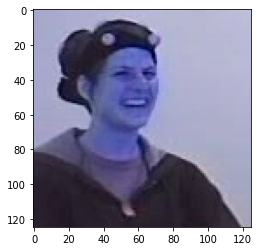

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(frames[0])

In [ ]:
len(fails), len(os.listdir('/content/Session05_subclips')), len(df_iemocap)

(1283, 887, 2170)

In [ ]:
!zip -r Session05_subclips.zip Session05_subclips/

In [ ]:
!cp Session05_subclips.zip '/content/drive/MyDrive/datasets/'

In [ ]:
import json

with open('wrong_videos_05.json', 'w') as f:
  json_string = json.dumps(fails)
  json.dump(json_string, f)

**Reducing** to n frames

In [ ]:
videos_path = 'Session05_subclips'
n_frames = 8

videos_names = os.listdir(videos_path)
len(videos_names)

887

In [ ]:
for i, file in enumerate(videos_names):
  arr = np.load(join(videos_path, file))
  step = arr.shape[0] / n_frames
  selects = [int(i*step) for i in range(0,n_frames)]
  new_arr = np.take(arr, selects, 0)
  np.save(join(videos_path, file), new_arr)

In [ ]:
print(step, selects)
print(arr.shape)
print(new_arr.shape)

5.875 [0, 5, 11, 17, 23, 29, 35, 41]
(47, 125, 125, 3)
(8, 125, 125, 3)


In [ ]:
!zip -r Session05_subclips_reduced.zip Session05_subclips/

In [ ]:
!cp Session05_subclips_reduced.zip '/content/drive/MyDrive/datasets/'

Making the **pool of frames** per session

In [ ]:
!mkdir Pool

In [ ]:
for i, clip_name in enumerate(os.listdir('Session05_subclips')):
  clip = np.load(join('Session05_subclips', clip_name))
  for j, frame in enumerate(clip):
    np.save(join('Pool', str(j+1)+clip_name), frame)

In [ ]:
len(os.listdir('Pool')), len(os.listdir('Session05_subclips'))

(7544, 943)

In [ ]:
!zip -r Session05_PoolFrames.zip Pool/

In [ ]:
!cp Session05_PoolFrames.zip 'drive/MyDrive/datasets/'

#### **AUDIO**

Separating into subaudios

In [ ]:
import librosa as lib
import numpy as np
from pydub import AudioSegment

In [ ]:
import pandas as pd

sess = 5
df_iemocap = pd.read_csv('IEMOCAP_sess0{}_proc.csv'.format(sess), ',')
df_iemocap

In [ ]:
videos_path = 'Session{}/dialog/wav'.format(sess)
folder_2_save = 'Session0{}_melspectrogram'.format(sess)
# temp_folder = 'temp'

!mkdir $folder_2_save
# !mkdir $temp_folder

In [ ]:
from os.path import join

Saving the average mel spectograms as vectors

In [ ]:
fails = []
sr = 44100
n_mels = 320
for i, row in df_iemocap.iterrows():
  file = row['file_name'][:-5] + '.wav'
  start = int(row['start_time']*1000)
  end = int(row['end_time']*1000)
  try:
    newAudio = AudioSegment.from_wav(join(videos_path, file))
    newAudio = newAudio[start:end]
    # newAudio.export("prob.wav", format="wav")
    samples = newAudio.get_array_of_samples()
    samples = np.array(samples).astype(np.float32)
    mel_spec = lib.feature.melspectrogram(y=samples, sr=sr, n_mels= n_mels)
    mel_db = (lib.power_to_db(mel_spec, ref=np.max) + 40)/40
    np.save(join(folder_2_save, row['file_name'] +'.npy'), mel_db)
  except:
    fails += [i]
  if (i+1) %200 == 0:
    print('{} clips processed'.format(i+1))

200 clips processed
400 clips processed
600 clips processed
800 clips processed
1000 clips processed
1200 clips processed
1400 clips processed
1600 clips processed
1800 clips processed
2000 clips processed


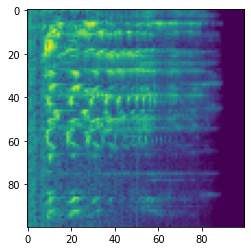

In [ ]:
import cv2
import matplotlib.pyplot as plt

plt.imshow(cv2.resize(mel,(100,100)))

Saving the mel spectograms

In [ ]:
fails = []
for i, row in df_iemocap.iterrows():
  file = row['file_name'][:-5] + '.wav'
  start = int(row['start_time']*1000)
  end = int(row['end_time']*1000)
  try:
    newAudio = AudioSegment.from_wav(join(videos_path, file))
    newAudio = newAudio[start:end]
    # newAudio.export("prob.wav", format="wav")
    samples = newAudio.get_array_of_samples()
    samples = np.array(samples).astype(np.float32)
    mfccs = np.mean(lib.feature.mfcc(y=samples, sr=44100, n_mfcc=40).T, axis=0)
    np.save(join(folder_2_save, row['file_name'] +'.npy'), mfccs)
  except:
    fails += [i]
  if (i+1) %200 == 0:
    print('{} clips processed'.format(i+1))

200 clips processed
400 clips processed
600 clips processed
800 clips processed
1000 clips processed
1200 clips processed
1400 clips processed
1600 clips processed
1800 clips processed
2000 clips processed


In [ ]:
print(len(fails), 'fails')

0 fails


In [ ]:
!zip -r session05_audios_npy.zip Session05_subaudios/

In [ ]:
!cp session05_audios_npy.zip drive/MyDrive/datasets/session-05/

In [ ]:
!zip -r session05_melspectrogram.zip Session05_melspectrogram/
!cp session05_melspectrogram.zip drive/MyDrive/datasets/session-05/

Saving the mel spectograms as images

In [ ]:
from PIL import Image

In [ ]:
path = 'drive/MyDrive/datasets/session-0{}/session0{}_melspectrogram.zip'
for i in [1,2,3,4,5]:
  os.system('unzip '+ path.format(i,i))

In [ ]:
def scale_minmax(X, min=0.0, max=1.0):
  X_std = (X - X.min()) / (X.max() - X.min())
  X_scaled = X_std * (max - min) + min
  return X_scaled

In [ ]:
file2save = 'Spectograms_sess0{}'
path = 'Session0{}_melspectrogram'

In [ ]:
for i in [1,2,3,4,5]:
  os.mkdir(file2save.format(i))
  for j, n in enumerate(os.listdir(path.format(i))):
    smel = np.load(join(path.format(i),n))
    img = scale_minmax(smel, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy
    name = n[:-3] + 'jpg'
    im = Image.fromarray(img)
    im.save(join(file2save.format(i),name))

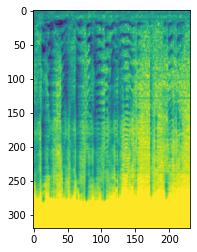

In [ ]:
plt.imshow(img2)

In [ ]:
for i in [1,2,3,4,5]:
  os.system('zip -r spectograms_sess0{}.zip Spectograms_sess0{}/'.format(i,i))
  os.system('cp spectograms_sess0{}.zip drive/MyDrive/datasets/session-0{}/'.format(i,i))

# Independent processing: Facial Modality

In [ ]:
!rm *05*

In [ ]:
import os
from os.path import exists, join
import random
import pandas as pd
import numpy as np
import cv2
import json

import torch
from torch.utils.data import Dataset
from torch.optim import Adam

In [ ]:
for i in [1,2,3,4,5]:
    os.system('unzip drive/MyDrive/AVT_Project/session-0{}/Pool_reducFaces.zip'.format(i))

In [ ]:
Classs = {'exc':0, 'neu':1, 'sad':2, 'hap':0, 'ang':3}
# {'exc':0, 'neu':1, 'fru':2, 'sad':3, 'hap':4, 'ang':5}

In [ ]:
from torch.utils.data.dataloader import default_collate

def my_collate(batch):
	batch = filter(lambda img: img is not None, batch)
	return default_collate(list(batch))

In [ ]:
class continuous_IEMOCAP(Dataset):
    def __init__(self, roots='', csv_s='', fails_files='',
                classes={}, mode='', sess=1, transform=None):
        super(continuous_IEMOCAP, self).__init__()
        self.DataRoots = roots
        self.AnnotationFiles = csv_s
        self.FailsFiles = fails_files
        self.Transform = transform
        self.Mode = mode
        self.Classes = classes
        self.loadData(sess)
  
    def loadData(self, sess):
        self.Annotations = pd.read_csv(self.AnnotationFiles[sess], ',')
        with open(self.FailsFiles[sess], 'r') as jsonfile:
            self.Fails = json.loads(jsonfile.read())['list']
    
        self.Data = {}
        file_names = os.listdir(self.DataRoots[sess])
        for i, row in self.Annotations.iterrows():
            if i in self.Fails:
                continue
            if row['emotion'] not in list(self.Classes.keys()):
                continue
            # if not row['mode'] in self.Mode:
            #     continue
            for j in range(8):
                true_name = str(j+1) + row['file_name'] + '.npy' 
                self.Data[true_name] = row['emotion']
    
        self.DataKeys = list(self.Data.keys())

    def add_session(self, sess):
        temp_ann = pd.read_csv(self.AnnotationFiles[sess], ',')
        with open(self.FailsFiles[sess], 'r') as jsonfile:
            temp_fai = json.loads(jsonfile.read())['list']
        
        file_names = os.listdir(self.DataRoots[sess])
        for i, row in temp_ann.iterrows():
            if i in temp_fai:
                continue
            if row['emotion'] not in list(self.Classes.keys()):
                continue
            # if not row['mode'] in self.Mode:
            #     continue
            for j in range(8):
                true_name = str(j+1) + row['file_name'] +'.npy'
                self.Data[true_name] = row['emotion']
                self.DataKeys.append(true_name)

        self.Annotations = pd.concat([self.Annotations, temp_ann], ignore_index=True)
        self.Fails += temp_fai
        print('Session {} added'.format(sess))

    def __len__(self):
        return len(self.Data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        if 'Ses01' in self.DataKeys[idx]:
            root = self.DataRoots[1]
        elif 'Ses02' in self.DataKeys[idx]:
            root = self.DataRoots[2]
        elif 'Ses03' in self.DataKeys[idx]:
            root = self.DataRoots[3]
        elif 'Ses04' in self.DataKeys[idx]:
            root = self.DataRoots[4]
        elif 'Ses05' in self.DataKeys[idx]:
            root = self.DataRoots[5]
        else:
            raise KeyError('File {} not found.'.format(self.DataKeys[idx]))

        label = self.Classes[self.Data[self.DataKeys[idx]]]
        data = np.load(join(root, self.DataKeys[idx]))
        if data.shape[0] < 100:
            return None
        sample = {'data': data, 'label': label, 'name': self.DataKeys[idx]}

        if self.Transform:
            sample = self.Transform(sample)
        return sample

    def make_shuffle(self):
        random.shuffle(self.DataKeys)

In [ ]:
import cv2

class FaceTransform(object):
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        data, label, name = sample['data'], sample['label'], sample['name']

        data = cv2.resize(data, (self.output_size))
        data = data.transpose(2,0,1)
        label = np.asarray([label])
        return {'data': torch.from_numpy(data).float(),
                'label': torch.from_numpy(label).long(),
                'name': name}

In [ ]:
ROOTS = {1: 'Pool_reducedfaces_01',
         2: 'Pool_reducedfaces_02',
         3: 'Pool_reducedfaces_03',
         4: 'Pool_reducedfaces_04',
         5: 'Pool_reducedfaces_05'}

CSVS = {1: 'IEMOCAP_sess01_proc.csv',
        2: 'IEMOCAP_sess02_proc.csv',
        3: 'IEMOCAP_sess03_proc.csv',
        4: 'IEMOCAP_sess04_proc.csv',
        5: 'IEMOCAP_sess05_proc.csv'}

WRONGS = {1: 'wrong_videos_01.json',
          2: 'wrong_videos_02.json',
          3: 'wrong_videos_03.json',
          4: 'wrong_videos_04.json',
          5: 'wrong_videos_05.json'}

In [ ]:
train_dataset = continuous_IEMOCAP(roots=ROOTS,
                                   csv_s=CSVS,
                                   fails_files=WRONGS,
                                   classes=Classs,
                                   sess=1,
                                   transform=FaceTransform((48,48)))
len(train_dataset)

3864

In [ ]:
for i in [2,3,4]:
    train_dataset.add_session(sess=i)
                            #   path='Pool_reducedfaces_0{}'.format(i),
                            #   annotation_csv='IEMOCAP_sess0{}_proc.csv'.format(i),
                            #   failes='wrong_videos_0{}.json'.format(i))
    print(len(train_dataset))

Session 2 added
7512
Session 3 added
11688
Session 4 added
15288


In [ ]:
train_dataset.make_shuffle()

In [ ]:
test_dataset = continuous_IEMOCAP(roots=ROOTS,
                                   csv_s=CSVS,
                                   fails_files=WRONGS,
                                   classes=Classs,
                                   sess=5,
                                   transform=FaceTransform((48,48)))
len(test_dataset)

4112

In [ ]:
test_dataset.make_shuffle()

MODEL

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [ ]:
cfg = {
	'VGG11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
	'VGG13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
	'VGG16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
	'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

class ShortVGG(nn.Module):
	def __init__(self, vgg_name='VGG19', numclasses=8, pretrain=False):
		super(ShortVGG, self).__init__()
		self.Name = vgg_name
		self.features = self._make_layers(cfg[vgg_name])
		self.avgpool = nn.AvgPool2d(kernel_size=1, stride=1)
		self.classifier = nn.Linear(512, numclasses)
		if pretrain:
			self.load_pretrain()

	def forward(self, x):
		out = self.features(x)
		out = self.avgpool(out)
		out = out.view(out.size(0), -1)
		out = F.dropout(out, p=0.5, training=self.training)
		out = self.classifier(out)
		return out

	def _make_layers(self, cfg):
		layers = []
		in_channels = 3
		for x in cfg:
			if x == 'M':
				layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
			else:
				layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
									nn.BatchNorm2d(x),
									nn.ReLU(inplace=True)]
				in_channels = x
		
		return nn.Sequential(*layers)

In [ ]:
del model
del optimizer

In [ ]:
model = ShortVGG(numclasses=4)
model

ShortVGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128

In [ ]:
model = model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())

TRAIN

In [ ]:
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm

In [ ]:
BatchSize = 64

train_dataloader = DataLoader(train_dataset, batch_size=BatchSize,
                              collate_fn=my_collate)
test_dataloader = DataLoader(test_dataset, batch_size=BatchSize,
                              collate_fn=my_collate)

In [ ]:
epochI = 0
epochF = 22
H_train_loss, H_train_acc = [], []
H_val_loss, H_val_acc = [], []

len(train_dataloader), len(test_dataloader)

(239, 65)

In [ ]:
for epoch in range(epochI, epochF):
    Tacloss, Vacloss = 0, 0
    Tacacc, Vacacc = 0, 0
    Tcont, Vcont = 0, 0
    model.train()
    for sample in tqdm(train_dataloader):
        data = sample['data'].float().cuda()
        label = sample['label'].flatten()
        optimizer.zero_grad()
        # print(data.shape)
        out = model(data).to('cpu')
        loss = criterion(out, label)
        loss.backward()
        optimizer.step()
        Tacloss += loss.item()
        Tacacc += (torch.argmax(out, dim=1) == label).float().sum()
        Tcont += data.shape[0]
    model.eval()
    with torch.no_grad():
        for sample in tqdm(test_dataloader):
            data = sample['data'].float().cuda()
            label = sample['label'].flatten()
            out = model(data).to('cpu')
            loss = criterion(out, label)

            Vacloss += loss.item()
            Vacacc += (torch.argmax(out, dim=1) == label).float().sum()
            Vcont += data.shape[0]
            # sleep(0.25)
    H_train_loss += [Tacloss/Tcont]
    H_train_acc += [Tacacc/Tcont]

    H_val_loss += [Vacloss/Vcont]
    H_val_acc += [Vacacc/Vcont]

    print('[%3d/%3d] train_loss: %.4f | val_loss: %.4f | train_acc: %.4f | val_acc: %.4f'%
            (epoch+1, epochF, H_train_loss[-1], H_val_loss[-1], H_train_acc[-1], H_val_acc[-1]))


[  1/ 22] train_loss: 0.0230 | val_loss: 0.0222 | train_acc: 0.2882 | val_acc: 0.2968



[  2/ 22] train_loss: 0.0219 | val_loss: 0.0215 | train_acc: 0.2927 | val_acc: 0.3752



[  3/ 22] train_loss: 0.0217 | val_loss: 0.0213 | train_acc: 0.2926 | val_acc: 0.3752



[  4/ 22] train_loss: 0.0217 | val_loss: 0.0215 | train_acc: 0.2916 | val_acc: 0.3752



[  5/ 22] train_loss: 0.0216 | val_loss: 0.0216 | train_acc: 0.3030 | val_acc: 0.2820



[  6/ 22] train_loss: 0.0215 | val_loss: 0.0215 | train_acc: 0.3176 | val_acc: 0.3109



[  7/ 22] train_loss: 0.0214 | val_loss: 0.0213 | train_acc: 0.3346 | val_acc: 0.3341



[  8/ 22] train_loss: 0.0213 | val_loss: 0.0214 | train_acc: 0.3330 | val_acc: 0.2754



[  9/ 22] train_loss: 0.0212 | val_loss: 0.0216 | train_acc: 0.3395 | val_acc: 0.2477



[ 10/ 22] train_loss: 0.0211 | val_loss: 0.0222 | train_acc: 0.3404 | val_acc: 0.2241



[ 11/ 22] train_loss: 0.0209 | val_loss: 0.0230 | train_acc: 0.3529 | val_acc: 0.2363



[ 12/ 22] train_loss: 0.0201 | val_loss: 0.0280 | train_acc: 0.3978 | val_acc: 0.3929



[ 13/ 22] train_loss: 0.0194 | val_loss: 0.0194 | train_acc: 0.4177 | val_acc: 0.4263



[ 14/ 22] train_loss: 0.0187 | val_loss: 0.0209 | train_acc: 0.4577 | val_acc: 0.4341



[ 15/ 22] train_loss: 0.0181 | val_loss: 0.0229 | train_acc: 0.4764 | val_acc: 0.3708



[ 16/ 22] train_loss: 0.0175 | val_loss: 0.0210 | train_acc: 0.5047 | val_acc: 0.4477



[ 17/ 22] train_loss: 0.0169 | val_loss: 0.0214 | train_acc: 0.5303 | val_acc: 0.4501



[ 18/ 22] train_loss: 0.0162 | val_loss: 0.0227 | train_acc: 0.5557 | val_acc: 0.4555



[ 19/ 22] train_loss: 0.0157 | val_loss: 0.0230 | train_acc: 0.5754 | val_acc: 0.4552



[ 20/ 22] train_loss: 0.0152 | val_loss: 0.0264 | train_acc: 0.5964 | val_acc: 0.4080



[ 21/ 22] train_loss: 0.0146 | val_loss: 0.0236 | train_acc: 0.6163 | val_acc: 0.4623



[ 22/ 22] train_loss: 0.0140 | val_loss: 0.0260 | train_acc: 0.6358 | val_acc: 0.4061


In [ ]:
print(Tacloss, Vacloss)
print(Tacacc, Vacacc)
print(Tcont, Vcont)

212.31376719474792 106.95304489135742
tensor(9658.) tensor(1669.)
15190 4110


In [ ]:
D = {'model': model.state_dict(),
     'opt': optimizer.state_dict()}

torch.save(D, 'vgg19_face_22E_63_40acc_v4.pth')

In [ ]:
for epoch in range(epochI+22, epochF+8):
    Tacloss, Vacloss = 0, 0
    Tacacc, Vacacc = 0, 0
    Tcont, Vcont = 0, 0
    model.train()
    for sample in tqdm(train_dataloader):
        data = sample['data'].float().cuda()
        label = sample['label'].flatten()
        optimizer.zero_grad()
        # print(data.shape)
        out = model(data).to('cpu')
        loss = criterion(out, label)
        loss.backward()
        optimizer.step()
        Tacloss += loss.item()
        Tacacc += (torch.argmax(out, dim=1) == label).float().sum()
        Tcont += data.shape[0]
    model.eval()
    with torch.no_grad():
        for sample in tqdm(test_dataloader):
            data = sample['data'].float().cuda()
            label = sample['label'].flatten()
            out = model(data).to('cpu')
            loss = criterion(out, label)

            Vacloss += loss.item()
            Vacacc += (torch.argmax(out, dim=1) == label).float().sum()
            Vcont += data.shape[0]
            # sleep(0.25)
    H_train_loss += [Tacloss/Tcont]
    H_train_acc += [Tacacc/Tcont]

    H_val_loss += [Vacloss/Vcont]
    H_val_acc += [Vacacc/Vcont]

    print('[%3d/%3d] train_loss: %.4f | val_loss: %.4f | train_acc: %.4f | val_acc: %.4f'%
            (epoch+1, epochF, H_train_loss[-1], H_val_loss[-1], H_train_acc[-1], H_val_acc[-1]))


[ 23/ 22] train_loss: 0.0133 | val_loss: 0.0251 | train_acc: 0.6596 | val_acc: 0.4280



[ 24/ 22] train_loss: 0.0126 | val_loss: 0.0300 | train_acc: 0.6798 | val_acc: 0.3759



[ 25/ 22] train_loss: 0.0119 | val_loss: 0.0354 | train_acc: 0.6946 | val_acc: 0.3703



[ 26/ 22] train_loss: 0.0114 | val_loss: 0.0319 | train_acc: 0.7128 | val_acc: 0.3652



[ 27/ 22] train_loss: 0.0107 | val_loss: 0.0407 | train_acc: 0.7305 | val_acc: 0.2423



[ 28/ 22] train_loss: 0.0100 | val_loss: 0.0340 | train_acc: 0.7500 | val_acc: 0.3348



[ 29/ 22] train_loss: 0.0093 | val_loss: 0.0355 | train_acc: 0.7701 | val_acc: 0.3633



[ 30/ 22] train_loss: 0.0088 | val_loss: 0.0385 | train_acc: 0.7791 | val_acc: 0.3742


In [ ]:
D = {'model': model.state_dict(),
     'opt': optimizer.state_dict()}

torch.save(D, 'vgg19_face_30E_77_37acc_v4.pth')

In [ ]:
for epoch in range(epochI+30, epochF+14):
    Tacloss, Vacloss = 0, 0
    Tacacc, Vacacc = 0, 0
    Tcont, Vcont = 0, 0
    model.train()
    for sample in tqdm(train_dataloader):
        data = sample['data'].float().cuda()
        label = sample['label'].flatten()
        optimizer.zero_grad()
        # print(data.shape)
        out = model(data).to('cpu')
        loss = criterion(out, label)
        loss.backward()
        optimizer.step()
        Tacloss += loss.item()
        Tacacc += (torch.argmax(out, dim=1) == label).float().sum()
        Tcont += data.shape[0]
    model.eval()
    with torch.no_grad():
        for sample in tqdm(test_dataloader):
            data = sample['data'].float().cuda()
            label = sample['label'].flatten()
            out = model(data).to('cpu')
            loss = criterion(out, label)

            Vacloss += loss.item()
            Vacacc += (torch.argmax(out, dim=1) == label).float().sum()
            Vcont += data.shape[0]
            # sleep(0.25)
    H_train_loss += [Tacloss/Tcont]
    H_train_acc += [Tacacc/Tcont]

    H_val_loss += [Vacloss/Vcont]
    H_val_acc += [Vacacc/Vcont]

    print('[%3d/%3d] train_loss: %.4f | val_loss: %.4f | train_acc: %.4f | val_acc: %.4f'%
            (epoch+1, epochF, H_train_loss[-1], H_val_loss[-1], H_train_acc[-1], H_val_acc[-1]))


[ 31/ 22] train_loss: 0.0083 | val_loss: 0.0411 | train_acc: 0.7940 | val_acc: 0.3482



[ 32/ 22] train_loss: 0.0077 | val_loss: 0.0450 | train_acc: 0.8109 | val_acc: 0.3280



[ 33/ 22] train_loss: 0.0072 | val_loss: 0.0449 | train_acc: 0.8258 | val_acc: 0.3504



[ 34/ 22] train_loss: 0.0067 | val_loss: 0.0463 | train_acc: 0.8367 | val_acc: 0.3479



[ 35/ 22] train_loss: 0.0062 | val_loss: 0.0484 | train_acc: 0.8489 | val_acc: 0.3976



[ 36/ 22] train_loss: 0.0059 | val_loss: 0.0505 | train_acc: 0.8562 | val_acc: 0.3856


In [ ]:
D = {'model': model.state_dict(),
     'opt': optimizer.state_dict()}

torch.save(D, 'vgg19_face_30E_78_80acc_v3.pth')

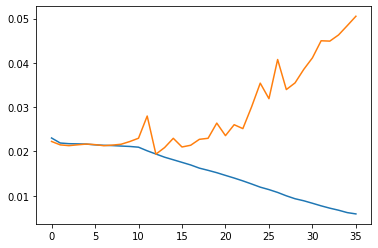

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(H_train_loss)), H_train_loss)
plt.plot(range(len(H_val_loss)), H_val_loss)

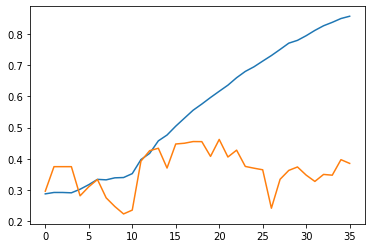

In [ ]:
plt.plot(range(len(H_train_acc)), H_train_acc)
plt.plot(range(len(H_val_acc)), H_val_acc)

In [ ]:
D = torch.load('vgg19_face_22E_63_40acc_v4.pth')
D = D['model']
type(D)

collections.OrderedDict

In [ ]:
torch.save(D, 'vgg19_face_22E_63_40acc_v4.pth')

In [ ]:
model.load_state_dict(D)

<All keys matched successfully>

In [ ]:

Tacacc = 0
Tcont = 0
with torch.no_grad():
    for sample in tqdm(test_dataloader):
        data = sample['data'].float().cuda()
        label = sample['label'].flatten()
        out = model(data).to('cpu')

        Tacacc += (torch.argmax(out, dim=1) == label).float().sum()
        Tcont += data.shape[0]

print('TT test_acc: %.4f'%(Tacacc/Tcont))


TT test_acc: 0.4061


In [ ]:
Vacacc,Vcont

(tensor(2925.), 3640)

In [ ]:
# from torch.utils.data import DataLoader
# train_dataloader = DataLoader(train_dataset, batch_size=64,
#                               collate_fn=my_collate)
# test_dataloader = DataLoader(test_dataset, batch_size=64,
#                              collate_fn=my_collate)
face_data = {}
# model.train()
Tacacc = 0
Tcont = 0
errors = 0
with torch.no_grad():
    for sample in tqdm(train_dataloader):
        data = sample['data'].float().cuda()
        label = sample['label'].flatten()
        out = model(data).to('cpu')

        Tacacc += (torch.argmax(out, dim=1) == label).float().sum()
        Tcont += data.shape[0]

        for j in range(data.shape[0]):
            face_data[sample['name'][j]] = (out[j], label[j])
    for sample in tqdm(test_dataloader):
        data = sample['data'].float().cuda()
        label = sample['label'].flatten()
        out = model(data).to('cpu')

        Tacacc += (torch.argmax(out, dim=1) == label).float().sum()
        Tcont += data.shape[0]

        for j in range(data.shape[0]):
            face_data[sample['name'][j]] = (out[j], label[j])
    # sleep(0.25)

print('test_acc: %.4f'%(Tacacc/Tcont))


test_acc: 0.5574


In [ ]:
face_data['1Ses01F_impro01_F001.npy'], len(face_data)

((tensor([-2.6742,  1.0907, -0.7816,  1.7598]), tensor(1)), 19300)

In [ ]:
pred_data = {}
for key in face_data:
  newkey = key[1:-4]
  dt = face_data[key][0].detach().numpy()
  label = face_data[key][1].item()
  if newkey in pred_data.keys():
    pred_data[newkey] = (pred_data[newkey][0]+[dt],
                         pred_data[newkey][1])
  else:
    pred_data[newkey] = ([dt],
                         label)

In [ ]:
pred_data['Ses01F_impro01_F001'], len(pred_data)

(([array([-2.6741748 ,  1.0906616 , -0.78158444,  1.7597529 ], dtype=float32),
   array([-0.91435695,  1.4087478 , -1.4716854 ,  0.39223275], dtype=float32),
   array([-0.86543334,  1.4193491 , -0.27148062, -0.5905165 ], dtype=float32),
   array([-2.2038307,  1.5104705, -1.3643011,  1.3490155], dtype=float32),
   array([-0.8080865,  1.0699142, -2.2345932,  1.2258134], dtype=float32),
   array([-1.6905752 ,  0.87984854, -1.2386665 ,  1.4660237 ], dtype=float32),
   array([-0.5532243,  1.088287 , -1.7635398,  0.6143289], dtype=float32),
   array([-1.8190402,  1.2778095, -1.1761734,  1.0934111], dtype=float32)],
  1),
 2423)

In [ ]:
D = {'model': model.state_dict()}
torch.save(D, 'vgg19Face_nopt_30E_78_80acc_v3.pth')

In [ ]:
import pickle

with open('facepreds_allsesss_v4_55A.p', 'wb') as handle:
    pickle.dump(pred_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!cp vgg19Face_nopt_22E_63_40acc_v4.pth drive/MyDrive/AVT_Project/
!cp facepreds_allsesss_v4_55A.p drive/MyDrive/AVT_Project/

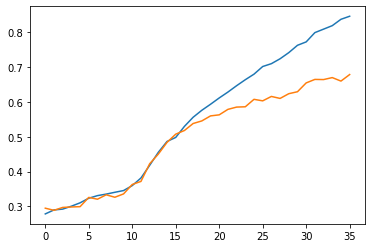

In [ ]:
plt.plot(range(len(H_train_acc)), H_train_acc)
plt.plot(range(len(H_val_acc)), H_val_acc)

In [ ]:
D = {'model': model.state_dict()}

torch.save(D, 'vgg19_face_36E_85_68acc.pth')

In [ ]:
!cp *.pth drive/MyDrive/AVT_Project/

In [ ]:
del train_dataset
del train_dataloader

# Independent processing: Audio Modality

In [ ]:
import pandas as pd

In [ ]:
!rm *.json

In [ ]:
import os
import random
from os.path import join, exists
from tqdm.notebook import tqdm

import numpy as np
import cv2
import matplotlib.pyplot as plt
import librosa

In [ ]:
for i in [1,2,3,4,5]:
    os.system("unzip drive/MyDrive/AVT_Project/session-0{}/session0{}_melspectrogram.zip".format(i,i))

In [ ]:
def get_audio_data(root, csvname, classes, sessions):
    data = []
    for i in sessions:
        df = pd.read_csv(csvname.format(i))
        for j, rw in tqdm(df.iterrows()):
            if rw['emotion'] not in list(classes.keys()):
                continue
            nn = rw['file_name'] + '.npy'
            D = np.load(join(root.format(i), nn))
            D = cv2.resize(D, (259,128))
            data.append((np.reshape(D, (128,259,1)),
                         classes[rw['emotion']],
                         rw['file_name']))
    random.shuffle(data)
    data, lss, names = zip(*data)
    # print(len(data), data[0].shape)
    return np.stack(data), np.asarray(lss), names

In [ ]:
audiodata, ys, nams = get_audio_data('Session0{}_melspectrogram',
                                     'IEMOCAP_sess0{}_proc.csv',
                                     {'exc':0, 'neu':1, 'sad':2, 'hap':0, 'ang':3},
                                     [1,2,3,4,5])
audiodata.shape, ys.shape, len(nams)

((5531, 128, 259, 1), (5531,), 5531)

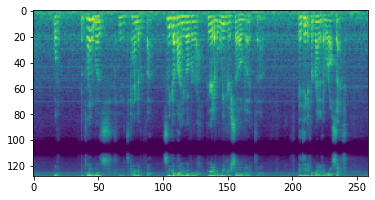

In [ ]:
plt.imshow(audiodata[0,:,:,0])

In [ ]:
# audiodata.shape, ys.shape

In [ ]:
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
# from keras.utils import to_categorical

from keras.models import Model, Sequential
from keras import optimizers
from keras.layers import Input, Conv1D, Conv2D,BatchNormalization, MaxPooling1D,MaxPooling2D, LSTM, Dense, Activation, Layer,Reshape

# from keras.utils import to_categorical
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
lb = LabelEncoder()
y_t = np_utils.to_categorical(lb.fit_transform(ys))
y_t.shape

(4290, 4)

In [ ]:
# CNN I/P Config
num_classes = 4 # len(np.unique(np.argmax(ys)))
input_shape = audiodata.shape[1:]
learning_rate = 0.0001
decay = 1e-6
momentum = 0.9

#LSTM Configuration
num_lstm = 256

input_shape, num_classes

((128, 259, 1), 4)

In [ ]:
# MODEL
model = Sequential(name='Audio_CNN_2D')

# LFLB1
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same',
                 data_format='channels_last',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128,kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(4,4), strides=(4,4)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(4,4), strides=(4,4)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(4,4), strides=(4,4)))
model.add(Dropout(0.25))

model.add(Flatten())
# FC
model.add(Dense(units=num_classes, activation='softmax'))

# Model compilation
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9,  beta_2=0.999, amsgrad=False)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "Audio_CNN_2D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 259, 128)     1280      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 259, 128)     512       
_________________________________________________________________
activation_4 (Activation)    (None, 128, 259, 128)     0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 129, 128)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 129, 128)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 129, 128)      147584    
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 129, 128)     

In [ ]:
#Train Config

batch_size = 32
num_epochs = 40

# Model Training
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
# Please change the model name accordingly.
mcp_save = ModelCheckpoint('Audio_2DCNN_4L_R2.h5', save_best_only=True, monitor='val_categorical_accuracy', mode='max')

cnnhistory=model.fit(audiodata, y_t,
                     batch_size=batch_size, epochs=num_epochs,
                     validation_split = 0.2,
                     callbacks=[mcp_save, lr_reduce])

Epoch 1/40
108/108 [==============================] - 15s 134ms/step - loss: 0.9318 - categorical_accuracy: 0.5973 - val_loss: 0.8857 - val_categorical_accuracy: 0.6149
Epoch 2/40
108/108 [==============================] - 14s 133ms/step - loss: 0.9241 - categorical_accuracy: 0.6087 - val_loss: 1.1206 - val_categorical_accuracy: 0.5217
Epoch 3/40
108/108 [==============================] - 14s 133ms/step - loss: 0.8996 - categorical_accuracy: 0.6192 - val_loss: 1.0721 - val_categorical_accuracy: 0.5466
Epoch 4/40
108/108 [==============================] - 14s 133ms/step - loss: 0.8939 - categorical_accuracy: 0.6235 - val_loss: 1.0115 - val_categorical_accuracy: 0.5885
Epoch 5/40
108/108 [==============================] - 14s 132ms/step - loss: 0.8830 - categorical_accuracy: 0.6177 - val_loss: 1.1131 - val_categorical_accuracy: 0.5435
Epoch 6/40
108/108 [==============================] - 14s 131ms/step - loss: 0.8725 - categorical_accuracy: 0.6396 - val_loss: 0.8739 - val_categorical_acc

val_categorical_accuracy 0.6506211161613464


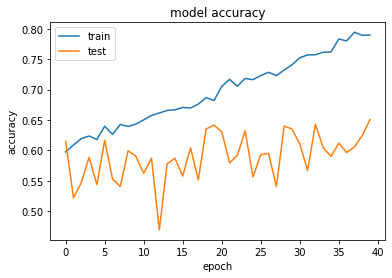

In [ ]:
print('val_categorical_accuracy',max(cnnhistory.history['val_categorical_accuracy']))

plt.plot(cnnhistory.history['categorical_accuracy'])
plt.plot(cnnhistory.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

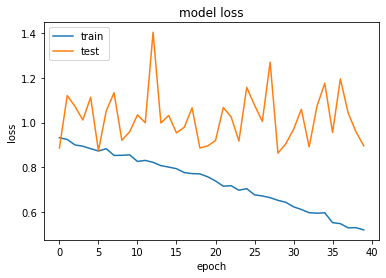

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import json
model_json = model.to_json()
with open("Audio_2DCNN_4L_R2.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
!cp Audio_2DCNN_4L_R2.* drive/MyDrive/AVT_Project/

In [ ]:
from keras.models import load_model
# from keras.models import model_from_json

# json_file = open('Audio_2DCNN_4L_R2.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)

# loaded_model.load_weights('Audio_2DCNN_4L_R2.h5')

# new_model = load_model('Audio_2DCNN_4L.h5')

In [ ]:
model = load_model('drive/MyDrive/AVT_Project/Audio_2DCNN_4L_R2.h5')
model.summary()

Model: "Audio_CNN_2D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 259, 128)     1280      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 259, 128)     512       
_________________________________________________________________
activation_4 (Activation)    (None, 128, 259, 128)     0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 129, 128)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 129, 128)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 129, 128)      147584    
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 129, 128)     

In [ ]:
lb = LabelEncoder()
y_t = np_utils.to_categorical(lb.fit_transform(ys))
y_t.shape

(5531, 4)

In [ ]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9,  beta_2=0.999, amsgrad=False)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = model.evaluate(audiodata, y_t, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 75.63%


In [ ]:
# np.argmax(, axis=-1)
predictions = model.predict(audiodata)
predictions.shape

(5531, 4)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
matrix = confusion_matrix(np.argmax(y_t, axis=-1), np.argmax(predictions, axis=-1))
print('  hap  neu sad  ang')
print (matrix)

  hap  neu sad  ang
[[1256   87  159  134]
 [ 322  911  285  190]
 [  36   13 1008   27]
 [  49   28   18 1008]]


In [ ]:
data = {}

for f,l,n in zip(predictions, y_t, nams):
    newkey = n

    if newkey in data.keys():
        continue
    else:
       data[newkey] = (f, l)

# newkey, dt, label

In [ ]:
data['Ses01F_impro01_F000']

(array([0.22371976, 0.31671417, 0.37204933, 0.08751677], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32))

In [ ]:
import pickle
with open('audio_preds_4e_75a.p', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!cp audio_preds_4e_75a.p drive/MyDrive/AVT_Project/

# Multimodal Processing: A + V(F) + T

##xtra

In [ ]:
import pandas as pd

In [ ]:
preds1 = pd.read_csv('IEMOCAP_traintext_prediccions.csv')
preds2 = pd.read_csv('IEMOCAP_validtext_prediccions.csv')
preds3 = pd.read_csv('IEMOCAP_testtext_prediccions.csv')

labls1 = pd.read_csv('IEMOCAP_train_set.csv')
labls2 = pd.read_csv('IEMOCAP_validation_set.csv')
labls3 = pd.read_csv('IEMOCAP_test_set.csv')

In [ ]:
predics = pd.concat([preds1, preds2, preds3], ignore_index=True)
labeles = pd.concat([labls1, labls2, labls3], ignore_index=True)

In [ ]:
for i,r in labeles.iterrows():
    break
r

speaker    Ses04F_impro06_M000
emotion                    sad
Name: 0, dtype: object

In [ ]:
len(predics), len(labeles)

(7380, 7380)

In [ ]:
Classes = {'exc':0, 'neu':1, 'sad':2, 'hap':0, 'ang':3}

In [ ]:
import numpy as np

In [ ]:
nerr = 0
p = list(predics['speaker'].values)
l = list(labeles['speaker'].values)

In [ ]:
for i in p:
    if i not in l:
        nerr += 1
nerr

0

In [ ]:
def create_text_dict(clases, nclases, df_prds, df_labl):
    temp1 = {}
    temp2 = {}
    temp0 = np.zeros(nclases)
    for _,r1 in df_prds.iterrows():
        E = r1['emotion']
        if E not in list(clases.keys()):
            continue
        temp = temp0.copy()
        temp[clases[E]] = 1.
        temp1[r1['speaker']] = temp
        
    for _,r2 in df_labl.iterrows():
        E = r2['emotion']
        if E not in list(clases.keys()):
            continue
        temp2[r2['speaker']] = clases[E]

    data = {}
    for k in list(temp1.keys()):
        if k in list(temp1.keys()) and k in list(temp2.keys()):
            data[k] = (temp1[k], temp2[k])
    return data    

In [ ]:
text_preds = create_text_dict(Classes, 4, predics, labeles)

In [ ]:
text_preds['Ses01F_impro02_F020'], len(text_preds)

((array([0., 0., 1., 0.]), 2), 5188)

In [ ]:
import pickle

with open('text_preds_4e_6*A.p', 'wb') as handle:
    pickle.dump(text_preds, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
!cp *.p drive/MyDrive/AVT_Project/

##pprocess

In [ ]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F

import numpy as np
import pandas as pd
import pickle

In [ ]:
class DatasetIEMOCAP(Dataset):
    def __init__(self, classes, FaceR, AudioR, TextR, method='avg', mode='train', transform=None):
        super(DatasetIEMOCAP, self).__init__()
        self.Data = {}
        self.DataKeys = []
        self.Face = True
        self.Audio = True
        self.Text = True
        self.Transform = transform
        self.Classes = classes
        self.Mode = mode
        self.Method = method
        self.loadData(FaceR, AudioR, TextR)

    def loadData(self, face_results, audio_results, text_results):
        LFks = list(face_results.keys())
        LAks = list(audio_results.keys())
        LTks = list(text_results.keys())

        for k in LAks:
            if 's05' in k and self.Mode == 'train':
                continue
            if self.Mode == 'test' and 's05' not in k:
                continue
            
            if k in LFks:
                FD = self.convert(face_results[k][0])
            else:
                FD = None
            if k in LTks:
                TD = text_results[k][0]
            else:
                TD = None
            AD = audio_results[k][0]

            self.Data[k] = (audio_results[k][1], FD, AD, TD)
        self.DataKeys = list(self.Data.keys())
  
    def convert(self, facial_data):
        if self.Method[0] is 'a':
            facedata = np.mean(np.stack(facial_data), axis=0)
            facedata = np.expand_dims(facedata, 0)
            facedata = F.softmax(torch.from_numpy(facedata),dim=-1)
            facedata = facedata.numpy()
        elif self.Method[0] is 'v':
            mv = np.bincount(np.argmax(np.stack(facial_data),axis=1)).argmax()
            facedata = np.zeros(facedata[0].shape)
            facedata[mv] = 1.0
            # facedata = torch.from_numpy(facedata)
        elif self.Method[0] is 'c':
            # facedata = torch.from_numpy(np.concatenate(facial_data))
            facedata = np.concatenate(facial_data)
        
        return facedata

    def __len__(self):
        return len(self.DataKeys)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        avs = np.ones(3)
        label = self.Data[self.DataKeys[idx]][0]
        face = self.Data[self.DataKeys[idx]][1]
        if face is None:
            avs[0] = 0.
            face = np.zeros(self.Classes['number'])
        
        audio = self.Data[self.DataKeys[idx]][2]
        if audio is None:
            avs[1] = 0.
            audio = np.zeros(self.Classes['number'])
        
        text = self.Data[self.DataKeys[idx]][3]
        if text is None:
            avs[2] = 0.
            text = np.zeros(self.Classes['number'])

        sample = {'face': face,
                  'audio': audio,
                  'text': text,
                  'label': label, 
                  'availabilities':avs,
                  'name': self.DataKeys[idx]}

        if self.Transform:
            sample = self.Transform(sample)
        return sample
    
    def make_shuffle(self):
        random.shuffle(self.DataKeys)

In [ ]:
# import torch.nn.functional as F

class FusionTransformer(object):
  def __init__(self, modename):
    self.mode = modename

  def __call__(self, sample):
    facedata, audiodata, textdata = sample['face'], sample['audio'], sample['text']
    label, avs, name = sample['label'], sample['availabilities'], sample['name']

    facedata = torch.flatten(torch.from_numpy(facedata))
    audiodata = F.softmax(torch.from_numpy(audiodata),dim=-1)
    textdata = torch.from_numpy(textdata)
    avs = torch.from_numpy(avs)
    label = np.asarray(label)

    return {'face': facedata.float(),
            'audio': audiodata.float(),
            'text': textdata.float(),
            'label': torch.from_numpy(label).long(),
            'availabilities': avs.float(),
            'name': name}

In [ ]:
from torch.utils.data.dataloader import default_collate

def my_collate(batch):
	batch = filter(lambda img: img is not None, batch)
	return default_collate(list(batch))

In [ ]:
Classes = {'exc':0, 'neu':1, 'sad':2, 'hap':0, 'ang':3, 'number': 4}

In [ ]:
# face_preds = 'drive/MyDrive/AVT_Project/facepreds_allsess_v4_55A.p'
# audi_preds = 'drive/MyDrive/AVT_Project/audiopreds_allsess_4e_75A.p'
# text_preds = 'drive/MyDrive/AVT_Project/text_preds_4e_6-A.p'

face_preds = 'facepreds_allsess_v4_55A.p'
audi_preds = 'audiopreds_allsess_4e_75A.p'
text_preds = 'text_preds_4e_6-A.p'

In [ ]:
with open(face_preds, 'rb') as dic:
    face_data = pickle.load(dic)
with open(audi_preds, 'rb') as dic:
    audi_data = pickle.load(dic)
with open(text_preds, 'rb') as dic:
    text_data = pickle.load(dic)

len(face_data), len(audi_data), len(text_data)

(2423, 5531, 5188)

In [ ]:
train_dataset = DatasetIEMOCAP(Classes, face_data, audi_data,
                               text_data, 'average',
                               transform=FusionTransformer(''))
test_dataset = DatasetIEMOCAP(Classes, face_data, audi_data,
                              text_data, 'average', mode = 'test',
                              transform=FusionTransformer(''))

In [ ]:
len(train_dataset), len(test_dataset)

(4290, 1241)

In [ ]:
train_dataset[0]

{'audio': tensor([0.1943, 0.1810, 0.1809, 0.4439]),
 'availabilities': tensor([1., 1., 1.]),
 'face': tensor([0.0288, 0.2307, 0.0125, 0.7280]),
 'label': tensor([[0, 0, 0, 1]]),
 'name': 'Ses03M_script02_2_F031',
 'text': tensor([0., 0., 0., 1.])}

MODELS: EMBRACENET & THE WRAPPER

In [ ]:
device = torch.device('cpu')

In [ ]:
import torch.nn as nn

class EmbraceNet(nn.Module):
  def __init__(self, device, input_size_list, embracement_size=256, bypass_docking=False):
    super(EmbraceNet, self).__init__()

    self.device = device
    self.input_size_list = input_size_list
    self.embracement_size = embracement_size
    self.bypass_docking = bypass_docking
    if (not bypass_docking):
      for i, input_size in enumerate(input_size_list):
        setattr(self, 'docking_%d' % (i), nn.Linear(input_size, embracement_size))

  def forward(self, input_list, availabilities=None, selection_probabilities=None):
    # check input data
    assert len(input_list) == len(self.input_size_list)
    num_modalities = len(input_list)
    batch_size = input_list[0].shape[0]
    # docking layer
    docking_output_list = []
    if (self.bypass_docking):
      docking_output_list = input_list
    else:
      for i, input_data in enumerate(input_list):
        x = getattr(self, 'docking_%d' % (i))(input_data)
        x = nn.functional.relu(x)
        docking_output_list.append(x)
    # check availabilities
    if (availabilities is None):
      availabilities = torch.ones(batch_size, len(input_list), dtype=torch.float, device=self.device)
    else:
      availabilities = availabilities.float()
    # adjust selection probabilities
    if (selection_probabilities is None):
      selection_probabilities = torch.ones(batch_size, len(input_list), dtype=torch.float, device=self.device)
    selection_probabilities = torch.mul(selection_probabilities, availabilities)

    probability_sum = torch.sum(selection_probabilities, dim=-1, keepdim=True)
    selection_probabilities = torch.div(selection_probabilities, probability_sum)
    # stack docking outputs
    docking_output_stack = torch.stack(docking_output_list, dim=-1)  # [batch_size, embracement_size, num_modalities]
    # embrace
    modality_indices = torch.multinomial(selection_probabilities, num_samples=self.embracement_size, replacement=True)  # [batch_size, embracement_size]
    modality_toggles = nn.functional.one_hot(modality_indices, num_classes=num_modalities).float()  # [batch_size, embracement_size, num_modalities]

    embracement_output_stack = torch.mul(docking_output_stack, modality_toggles)
    embracement_output = torch.sum(embracement_output_stack, dim=-1)  # [batch_size, embracement_size]

    return embracement_output

In [ ]:
class Wrapper(nn.Module):
  def __init__(self, n_classes=6, size_list=[6,6,6],
               embracesize=100, bypass_docking=False):
    super(Wrapper, self).__init__()
    self.NClasses = n_classes
    self.Embrace = EmbraceNet(device=device,
                              input_size_list=size_list,
                              embracement_size=embracesize,
                              bypass_docking=bypass_docking)
    self.classifier = False
    if embracesize != n_classes:
      self.classifier = True
      # setattr(self, 'docking_%d' % (i), nn.Linear(input_size, embracement_size))
      self.clf = nn.Sequential(nn.Linear(embracesize, n_classes),
                               nn.Softmax(dim=-1))

  def forward(self, face, audio, text, avs):
    out = self.Embrace([face, audio, text], availabilities=avs)
    if self.classifier:
      out = self.clf(out)
    return out

Multimodal fusion: four emotions

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data.dataloader import default_collate

def my_collate(batch):
	batch = filter(lambda img: img is not None, batch)
	return default_collate(list(batch))

In [ ]:
BatchSize = 32
train_dataloader = DataLoader(train_dataset,
                              batch_size=BatchSize, collate_fn=my_collate)
test_dataloader = DataLoader(test_dataset,
                             batch_size=BatchSize, collate_fn=my_collate)

In [ ]:
id1, id2 = int(len(dataloader)*0.7), int(len(dataloader)*0.8)
train_range, val_range, test_range = (0, id1), (id1, id2), (id2, len(dataloader))

train_range, val_range, test_range

In [ ]:
epochI = 0
epochF = 20

H_train_loss, H_train_acc, H_val_loss, H_val_acc = [],[],[],[]
len(train_dataloader), len(test_dataloader)

(135, 39)

In [ ]:
from torch.optim import Adam

model = Wrapper(n_classes=4, size_list=[4,4,4] ,embracesize=16
                # , bypass_docking=True
                )

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())

model

Wrapper(
  (Embrace): EmbraceNet(
    (docking_0): Linear(in_features=4, out_features=16, bias=True)
    (docking_1): Linear(in_features=4, out_features=16, bias=True)
    (docking_2): Linear(in_features=4, out_features=16, bias=True)
  )
  (clf): Sequential(
    (0): Linear(in_features=16, out_features=4, bias=True)
    (1): Softmax(dim=-1)
  )
)

In [ ]:
for epoch in range(epochI, epochF):
    Tacloss, Vacloss = 0, 0
    Tacacc, Vacacc = 0, 0
    Tcont, Vcont = 0, 0
    model.train()
    for sample in tqdm(train_dataloader):
        face_data = sample['face']
        audio_data = sample['audio']
        text_data = sample['text']
        label = torch.argmax(sample['label'], dim=-1)#.flatten()
        avails = sample['availabilities']
        
        optimizer.zero_grad()
        out = model(face_data, audio_data, text_data, avails)
        loss = criterion(out, label)
        loss.backward()
        optimizer.step()
        Tacloss += loss.item()
        Tacacc += (torch.argmax(out, dim=1) == label).float().sum()
        Tcont += face_data.shape[0]
    
    model.eval()
    with torch.no_grad():
        for sample in tqdm(test_dataloader):
            face_data = sample['face']
            audio_data = sample['audio']
            text_data = sample['text']
            label = torch.argmax(sample['label'], dim=-1)#.flatten()
            avails = sample['availabilities']
            out = model(face_data, audio_data, text_data, avails)
            loss = criterion(out, label)

            Vacloss += loss.item()
            Vacacc += (torch.argmax(out, dim=1) == label).float().sum()
            Vcont += face_data.shape[0]

    H_train_loss += [Tacloss/Tcont]
    H_train_acc += [Tacacc/Tcont]

    H_val_loss += [Vacloss/Vcont]
    H_val_acc += [Vacacc/Vcont]

    print('[%3d/%3d] train_loss: %.4f | val_loss: %.4f | train_acc: %.4f | val_acc: %.4f'%
        (epoch+1, epochF, H_train_loss[-1], H_val_loss[-1], H_train_acc[-1], H_val_acc[-1]))

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[  1/ 20] train_loss: 0.0432 | val_loss: 0.0428 | train_acc: 0.2937 | val_acc: 0.4633


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[  2/ 20] train_loss: 0.0409 | val_loss: 0.0406 | train_acc: 0.7126 | val_acc: 0.5923


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[  3/ 20] train_loss: 0.0373 | val_loss: 0.0383 | train_acc: 0.7396 | val_acc: 0.5979


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[  4/ 20] train_loss: 0.0342 | val_loss: 0.0366 | train_acc: 0.7748 | val_acc: 0.6398


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[  5/ 20] train_loss: 0.0322 | val_loss: 0.0355 | train_acc: 0.8371 | val_acc: 0.6535


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[  6/ 20] train_loss: 0.0306 | val_loss: 0.0346 | train_acc: 0.8697 | val_acc: 0.6922


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[  7/ 20] train_loss: 0.0295 | val_loss: 0.0339 | train_acc: 0.8932 | val_acc: 0.7156


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[  8/ 20] train_loss: 0.0287 | val_loss: 0.0335 | train_acc: 0.9058 | val_acc: 0.7172


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[  9/ 20] train_loss: 0.0282 | val_loss: 0.0331 | train_acc: 0.9138 | val_acc: 0.7252


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[ 10/ 20] train_loss: 0.0278 | val_loss: 0.0329 | train_acc: 0.9105 | val_acc: 0.7268


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[ 11/ 20] train_loss: 0.0275 | val_loss: 0.0325 | train_acc: 0.9163 | val_acc: 0.7373


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[ 12/ 20] train_loss: 0.0271 | val_loss: 0.0327 | train_acc: 0.9245 | val_acc: 0.7252


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[ 13/ 20] train_loss: 0.0268 | val_loss: 0.0323 | train_acc: 0.9291 | val_acc: 0.7341


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[ 14/ 20] train_loss: 0.0267 | val_loss: 0.0324 | train_acc: 0.9259 | val_acc: 0.7373


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[ 15/ 20] train_loss: 0.0265 | val_loss: 0.0323 | train_acc: 0.9350 | val_acc: 0.7309


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[ 16/ 20] train_loss: 0.0265 | val_loss: 0.0322 | train_acc: 0.9347 | val_acc: 0.7405


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[ 17/ 20] train_loss: 0.0263 | val_loss: 0.0322 | train_acc: 0.9392 | val_acc: 0.7349


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[ 18/ 20] train_loss: 0.0263 | val_loss: 0.0321 | train_acc: 0.9361 | val_acc: 0.7333


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[ 19/ 20] train_loss: 0.0262 | val_loss: 0.0320 | train_acc: 0.9338 | val_acc: 0.7365


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[ 20/ 20] train_loss: 0.0261 | val_loss: 0.0319 | train_acc: 0.9336 | val_acc: 0.7325


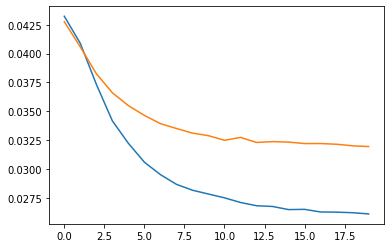

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(20), H_train_loss)
plt.plot(np.arange(20), H_val_loss)

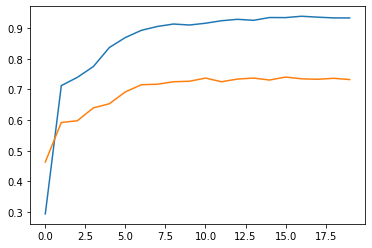

In [ ]:
plt.plot(np.arange(20), H_train_acc)
plt.plot(np.arange(20), H_val_acc)

In [ ]:
path = 'model_fusion_4E_20E_93_73A.pth'
torch.save({'model':model.state_dict(),
            'optimizer': optimizer.state_dict()}, path)

In [ ]:
!cp model_fusion_4E_20E_93_80A.pth drive/MyDrive/AVT_Project/

**Testing**

In [ ]:
model = Wrapper(n_classes=4, size_list=[4,4,4] ,embracesize=16
                # , bypass_docking=True
                )
model

In [ ]:
dicti = torch.load("drive/MyDrive/AVT_Project/model_fusion44_ep20.pth")
dicti.keys()

In [ ]:
model.load_state_dict(dicti['model'])

In [ ]:
test_dataset = DatasetIEMOCAP(csv_annot=test_path,
                              classes=Classes,
                              transform=FusionTransformer(''))

In [ ]:
test_dataset.loadFacialPredictions(facePredictions_path)
test_dataset.loadAudioIPredictions(audioPredictions_path)
test_dataset.loadTextPredictions('IEMOCAP_testtext_prediccions.csv')

In [ ]:
len(test_dataset)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
BatchSize = 1
test_dataloader_v2 = DataLoader(test_dataset, batch_size=BatchSize,
                                collate_fn=my_collate)

len(test_dataloader_v2)

1241

Multimodal: F + A + T

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
Tacacc = 0
Tcont = 0
errs = 0
yt , yp = [], []
model.eval()
for sample in tqdm(test_dataloader):
    face_data = sample['face']
    audio_data = sample['audio']
    text_data = sample['text']
    label = torch.argmax(sample['label'], dim=-1)
    avails = sample['availabilities']
    names = sample['name']#.flatten()
    if torch.sum(avails).item() < 1.0:
        errs += 1
        continue
    out = model(face_data, audio_data, text_data, avails)
    Tacacc += (torch.argmax(out, dim=1) == label).float().sum()
    yt += label.tolist()
    yp += torch.argmax(out, dim=1).tolist()
    Tcont += face_data.shape[0]

test_acc = Tacacc/Tcont

print('Acc in Test set:', test_acc)
print(errs, 'errors (no available)')

  0%|          | 0/39 [00:00<?, ?it/s]

Acc in Test set: tensor(0.7373)
0 errors (no available)


In [ ]:
print ('        hap  neu  sad  ang')
confusion_matrix(yt,yp)

        hap  neu  sad  ang


array([[357,  67,   9,   9],
       [ 54, 281,  21,  28],
       [ 27,  52, 155,  11],
       [ 17,  21,  10, 122]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['hap', 'neu', 'sad', 'ang']
print(classification_report(yt, yp, target_names=target_names))

              precision    recall  f1-score   support

         hap       0.78      0.81      0.80       442
         neu       0.67      0.73      0.70       384
         sad       0.79      0.63      0.70       245
         ang       0.72      0.72      0.72       170

    accuracy                           0.74      1241
   macro avg       0.74      0.72      0.73      1241
weighted avg       0.74      0.74      0.74      1241



Bimodal: T + A

In [ ]:
def get_none(shape):
  return torch.zeros(shape)

In [ ]:
Tacacc = 0
Tcont = 0
errs = 0
model.eval()
yt, yp = [], []
for sample in tqdm(test_dataloader):
    face_data = get_none(sample['face'].shape)
    audio_data = sample['audio']
    text_data = sample['text']
    label = torch.argmax(sample['label'], dim=-1)#.flatten()
    avails = sample['availabilities']
    avails[:,0]=0.
    names = sample['name']#.flatten()
    if torch.sum(avails).item() < 1.0:
        errs += 1
        continue

    out = model(face_data, audio_data, text_data, avails)
    Tacacc += (torch.argmax(out, dim=1) == label).float().sum()
    Tcont += face_data.shape[0]
    yt += label.tolist()
    yp += torch.argmax(out, dim=1).tolist()

test_acc = Tacacc/Tcont

print('Acc in Test set:', test_acc)
print(errs, 'errors (no available)')

  0%|          | 0/39 [00:00<?, ?it/s]

Acc in Test set: tensor(0.7639)
0 errors (no available)


In [ ]:
print ('        hap  neu  sad  ang')
confusion_matrix(yt,yp)

        hap  neu  sad  ang


array([[352,  78,   4,   8],
       [ 47, 317,   9,  11],
       [ 27,  65, 149,   4],
       [ 13,  23,   4, 130]])

In [ ]:
target_names = ['hap', 'neu', 'sad', 'ang']
print(classification_report(yt, yp, target_names=target_names))

              precision    recall  f1-score   support

         hap       0.80      0.80      0.80       442
         neu       0.66      0.83      0.73       384
         sad       0.90      0.61      0.73       245
         ang       0.85      0.76      0.80       170

    accuracy                           0.76      1241
   macro avg       0.80      0.75      0.77      1241
weighted avg       0.78      0.76      0.76      1241



Bimodal: T + F

In [ ]:
Tacacc = 0
Tcont = 0
errs = 0
yt,yp = [], []
model.eval()
for sample in tqdm(test_dataloader_v2):
    face_data = sample['face']
    audio_data = get_none(sample['audio'].shape)
    text_data = sample['text']
    label = torch.argmax(sample['label'], dim=-1)#.flatten()
    avails = sample['availabilities']
    avails[:,1]=0.
    names = sample['name']#.flatten()
    if torch.sum(avails).item() < 1.0:
        errs += 1
        continue
    out = model(face_data, audio_data, text_data, avails)
    Tacacc += (torch.argmax(out, dim=1) == label).float().sum()
    Tcont += face_data.shape[0]
    yt += label.tolist()
    yp += torch.argmax(out, dim=1).tolist()
test_acc = Tacacc/Tcont

print('Acc in Test set:', test_acc)
print(errs, 'errors (no available)')

  0%|          | 0/1241 [00:00<?, ?it/s]

Acc in Test set: tensor(0.7829)
140 errors (no available)


In [ ]:
print ('        hap  neu  sad  ang')
confusion_matrix(yt,yp)

        hap  neu  sad  ang


array([[356,  55,  10,   3],
       [ 43, 236,  31,  18],
       [ 21,  17, 167,  10],
       [  7,  12,  12, 103]])

In [ ]:
target_names = ['hap', 'neu', 'sad', 'ang']
print(classification_report(yt, yp, target_names=target_names))

              precision    recall  f1-score   support

         hap       0.83      0.84      0.84       424
         neu       0.74      0.72      0.73       328
         sad       0.76      0.78      0.77       215
         ang       0.77      0.77      0.77       134

    accuracy                           0.78      1101
   macro avg       0.77      0.78      0.78      1101
weighted avg       0.78      0.78      0.78      1101



Bimodal: A + F

In [ ]:
Tacacc = 0
Tcont = 0
errs = 0
yt,yp = [], []
model.eval()
for sample in tqdm(test_dataloader_v2):
    face_data = sample['face']
    audio_data = sample['audio']
    text_data = get_none(sample['text'].shape)
    label = torch.argmax(sample['label'], dim=-1)#.flatten()
    avails = sample['availabilities']
    avails[:,2]=0.
    names = sample['name']#.flatten()
    if torch.sum(avails).item() < 1.0:
        errs += 1
        continue
    out = model(face_data, audio_data, text_data, avails)

    Tacacc += (torch.argmax(out, dim=1) == label).float().sum()
    Tcont += face_data.shape[0]
    yt += label.tolist()
    yp += torch.argmax(out, dim=1).tolist()

test_acc = Tacacc/Tcont

print('Acc in Test set:', test_acc)
print(errs, 'errors (no available)')

  0%|          | 0/1241 [00:00<?, ?it/s]

Acc in Test set: tensor(0.5214)
0 errors (no available)


In [ ]:
print ('        hap  neu  sad  ang')
confusion_matrix(yt,yp)

        hap  neu  sad  ang


array([[272, 108,  15,  47],
       [ 77, 202,  35,  70],
       [ 33, 122,  63,  27],
       [ 33,  21,   6, 110]])

In [ ]:
target_names = ['hap', 'neu', 'sad', 'ang']
print(classification_report(yt, yp, target_names=target_names))

              precision    recall  f1-score   support

         hap       0.66      0.62      0.63       442
         neu       0.45      0.53      0.48       384
         sad       0.53      0.26      0.35       245
         ang       0.43      0.65      0.52       170

    accuracy                           0.52      1241
   macro avg       0.52      0.51      0.50      1241
weighted avg       0.54      0.52      0.51      1241

